# Econ 323 final project: Data Science Job Salaries analysis

Yahan Cong 87012175

## Introduction

Nowadays, data becomes more and more important in the real world. From online shopping to the COVID-19's prevention, big data support our activities. During the past few years, as an emergin industry of creating values from big data, data science has developed rapidly. And data scientist, as a new high-pay job with a large talent gap, has increasingly become one of the ideal choices for people's employment. This report will show the salary distribution among data scientists and the salary trend in the last past years. So before people decide to become data scientists, they can have an initial understanding of the data science industry salary and become more clear about therir career planning. 


## Data 

Our data comes from Kaggle's public data set: "Data Science Job Salaries". It provides data points for data scientists' yearly salaries among the whole world for the period from 2020 to 2022, alongside those data scientists' information, involving their working region, working experience, specific occupation and their working companies informations. The dataset was obtained from https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries, and the salary information are collected by ai-jobs.net Salaries.


## Loading dataset

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import patsy
import sklearn.model_selection
import sklearn.ensemble
import folium
import plotly.express
import json
import plotly.express as px

%matplotlib inline

In [92]:
dsSalary = pd.read_csv("ds_salaries.csv")

In [93]:
dsSalary = pd.read_csv("ds_salaries.csv")
#remove the unuseful "Unname" index column
dsSalary = dsSalary.drop(["Unnamed: 0"], axis = 1)

dsSalary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Data Wrangling and Exploratory Data Analysis

### Salary distribution (in USD. dollar)

From the dataset, we can see global salary distribution in the last three years.

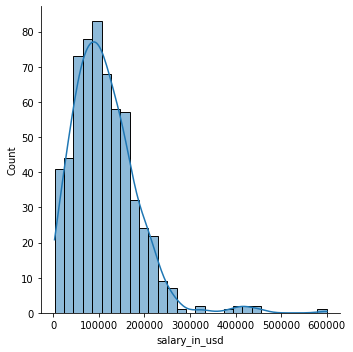

In [4]:
sns.displot(dsSalary["salary_in_usd"], kde = True)

### Work year analysis

Since data science is an emergin industry which becomes more and more hot in the last years, I hope to know in the last three years, what is data scientist' salaries changing trend.

In [5]:
dsSalary_year = dsSalary.groupby("work_year").agg(
    avg_salary_in_usd=('salary_in_usd', np.mean),
    avg_remote_ratio=('remote_ratio', np.mean),
)
ds_population_year = dsSalary["work_year"].value_counts()

In [6]:
dsSalary_year = pd.concat([ds_population_year, dsSalary_year], axis = 1)
dsSalary_year = dsSalary_year.rename(columns = {'work_year':"workers_num"})
dsSalary_year

,workers_num,avg_salary_in_usd,avg_remote_ratio
2020,72,95813.000000,64.583333
2021,217,99853.792627,69.124424
2022,318,124522.006289,73.584906


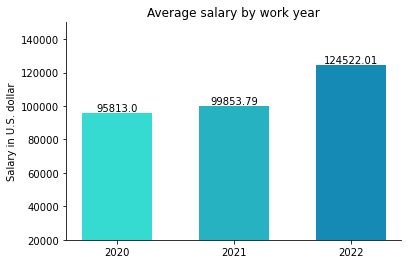

In [7]:
# get data from bar chart
def auto_text(rects):
    for rect in rects:
        ax.text(rect.get_x()+0.3, rect.get_height(), round(rect.get_height(),2), ha='center', va='bottom')

        
#create bar chart      
name_list = [2020,2021,2022]
color_list = ["#35dbd0","#27b2c2","#148ab5","#177ad1"]
fig,ax = plt.subplots()

bar_avg_salary = plt.bar(range(len(dsSalary_year["avg_salary_in_usd"])), dsSalary_year["avg_salary_in_usd"] ,
                         width = 0.6,color=color_list,tick_label=name_list)
plt.ylim(ymin = 20000, ymax = 150000)
auto_text(bar_avg_salary)

plt.title("Average salary by work year")
ax.set_ylabel("Salary in U.S. dollar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [8]:
salary_2020 = dsSalary.loc[dsSalary["work_year"] == 2020]["salary_in_usd"]
salary_2021 = dsSalary.loc[dsSalary["work_year"] == 2021]["salary_in_usd"]
salary_2022 = dsSalary.loc[dsSalary["work_year"] == 2022]["salary_in_usd"]
salary_2020 = salary_2020.reset_index(drop=True)
salary_2021 = salary_2021.reset_index(drop=True)
salary_2022 = salary_2022.reset_index(drop=True)

year_salary = pd.DataFrame({'2020': salary_2020, 
                            '2021':salary_2021 , 
                            '2022': salary_2022})
year_salary.head()

,2020,2021,2022
0,79833.0,82528.0,135000
1,260000.0,150000.0,155000
2,109024.0,235000.0,120600
3,20000.0,53192.0,130000
4,150000.0,100000.0,90000


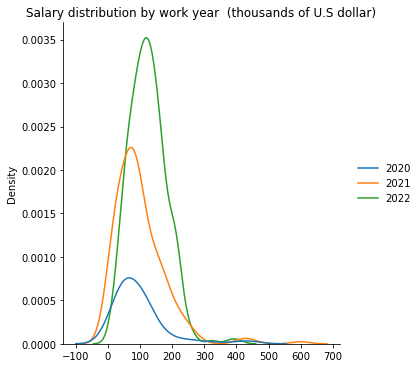

In [9]:
#print salary distribution in each year
an_salary_year = sns.displot((year_salary/1000), kind = "kde")
plt.title("Salary distribution by work year  (thousands of U.S dollar)")
plt.show()

From 2020 to 2022, data scientists' salary keeps increasing. A rapid increase appears in 2021- 2022. The average salary increases from $\$9k$ to $\$12k$, and the salary distribution tends to be concentrated.

### Working experience analysis

In [10]:
replacement_mapping_dict = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX":"Executive-level",
}
#dsSalary["experience_level"].replace(replacement_mapping_dict)

In [11]:
dsSalary_experience = dsSalary.groupby("experience_level").agg(
    avg_salary_in_usd=('salary_in_usd', np.mean),
    salary_in_usd = ('salary_in_usd', np.sum),
#     avg_remote_ratio=('remote_ratio', np.mean),
#     remote_ratio = ('remote_ratio', np.sum)
)
ds_population_experience = dsSalary["experience_level"].value_counts()

In [12]:
dsSalary_experience = pd.concat([ds_population_experience, dsSalary_experience], axis = 1)
experience_list = ["Entry-level","Mid-level","Senior-level","Executive-level"]
dsSalary_experience = dsSalary_experience.sort_values("avg_salary_in_usd")
dsSalary_experience

,experience_level,avg_salary_in_usd,salary_in_usd
EN,88,61643.318182,5424612
MI,213,87996.056338,18743160
SE,280,138617.292857,38812842
EX,26,199392.038462,5184193


Text(0.5, 1.0, 'Employed population by experience level')

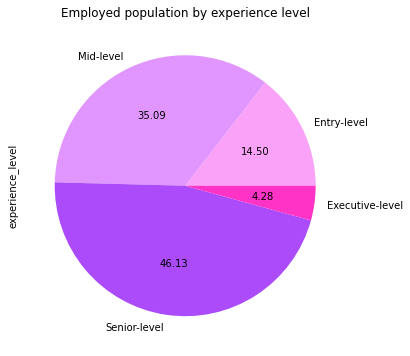

In [13]:
color_list_exp = ["#faa2f7","#e196ff","#ab4bfa","#ff33c5"]
dsSalary_experience["experience_level"].plot.pie(labels=experience_list,colors = color_list_exp,
                 autopct='%.2f',fontsize=10, figsize=(6, 6))
plt.title("Employed population by experience level")

Text(0.5, 1.0, 'Wage by experience level')

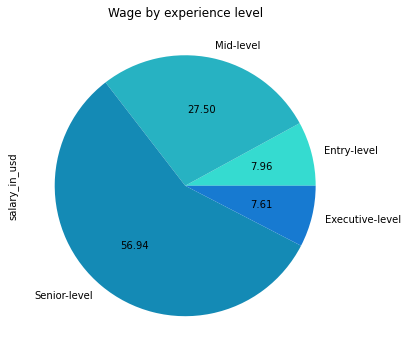

In [14]:
dsSalary_experience["salary_in_usd"].plot.pie(labels=experience_list,colors = color_list,
                 autopct='%.2f',fontsize=10, figsize=(6, 6))
plt.title("Wage by experience level")

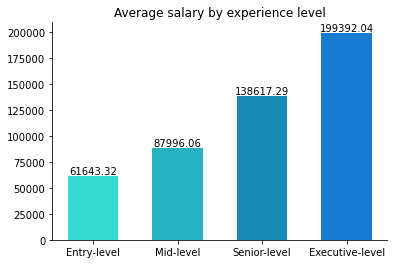

In [15]:
fig,ax = plt.subplots()
bar_avg_salary_experience = plt.bar(range(len(dsSalary_experience["avg_salary_in_usd"])), dsSalary_experience["avg_salary_in_usd"] ,
                         width = 0.6,color=color_list,tick_label=experience_list)
auto_text(bar_avg_salary_experience)
plt.title("Average salary by experience level")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [16]:
salary_EN = dsSalary.loc[dsSalary["experience_level"] == "EN"]["salary_in_usd"]
salary_MI = dsSalary.loc[dsSalary["experience_level"] == "MI"]["salary_in_usd"]
salary_SE = dsSalary.loc[dsSalary["experience_level"] == "SE"]["salary_in_usd"]
salary_EX = dsSalary.loc[dsSalary["experience_level"] == "EX"]["salary_in_usd"]
salary_EN = salary_EN.reset_index(drop=True)
salary_MI = salary_MI.reset_index(drop=True)
salary_SE = salary_SE.reset_index(drop=True)
salary_EX = salary_EX.reset_index(drop=True)

experience_salary = pd.DataFrame({'Entry-level': salary_EN, 
                            'Mid-level':salary_MI , 
                            'Senior-level': salary_SE,
                            'Executive-level':salary_EX})

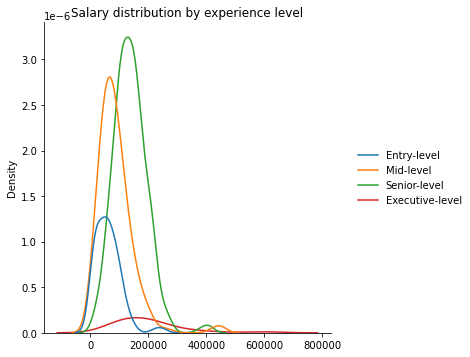

In [17]:
an_salary_year = sns.displot(experience_salary, kind = "kde")
plt.title("Salary distribution by experience level")
plt.show()

Text(0, 0.5, 'Average salary')

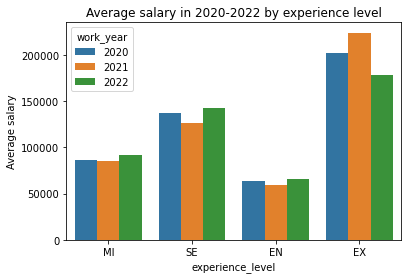

In [109]:
p = sns.barplot(data=dsSalary, x='experience_level', y='salary_in_usd', hue='work_year',ci = None)
p.set_title("Average salary in 2020-2022 by experience level")
p.set_ylabel('Average salary')
# fig=px.histogram(dsSalary, x='experience_level',y = "salary_in_usd",color='work_year', barmode='group',
#title="Count of each experience level")
# fig.show()

In the last three years, mid-level data scientists and senior-level shares the most data scientist' job market. And the excutive-level data scienctist enjoy highest salary.

### Employment type analysis

In [18]:
dsSalary_type = dsSalary.groupby("employment_type").agg(
    avg_salary_in_usd=('salary_in_usd', np.mean),
    salary_in_usd = ('salary_in_usd', np.sum),
    avg_remote_ratio=('remote_ratio', np.mean),
    remote_ratio = ('remote_ratio', np.sum)
)
ds_population_type = dsSalary["employment_type"].value_counts()

dsSalary_type = pd.concat([ds_population_type, dsSalary_type], axis = 1)
type_list = ["Full time","Part time","Contract","Freelance"]
#dsSalary_type = dsSalary_type.sort_values("avg_salary_in_usd")
dsSalary_type

,employment_type,avg_salary_in_usd,salary_in_usd,avg_remote_ratio,remote_ratio
FT,588,113468.073129,66719227,70.748299,41600
PT,10,33070.500000,330705,70.000000,700
CT,5,184575.000000,922875,100.000000,500
FL,4,48000.000000,192000,62.500000,250


In [19]:
salary_FT = dsSalary.loc[dsSalary["employment_type"] == "FT"]["salary_in_usd"]
salary_PT = dsSalary.loc[dsSalary["employment_type"] == "PT"]["salary_in_usd"]
salary_CT = dsSalary.loc[dsSalary["employment_type"] == "CT"]["salary_in_usd"]
salary_PL = dsSalary.loc[dsSalary["employment_type"] == "FL"]["salary_in_usd"]
salary_FT = salary_FT.reset_index(drop=True)
salary_PT = salary_PT.reset_index(drop=True)
salary_CT = salary_CT.reset_index(drop=True)
salary_PL = salary_PL.reset_index(drop=True)

type_salary = pd.DataFrame({'Full time': salary_EN, 
                            'Part time':salary_PT , 
                            'Contract': salary_CT,
                            'Freelance':salary_PL})
#type_salary.head(10)

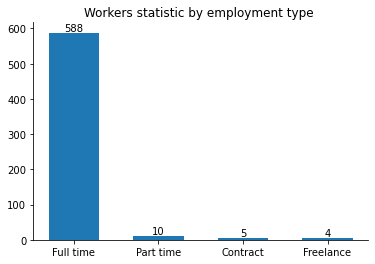

In [20]:
fig,ax = plt.subplots()
type_list = ["Full time","Part time","Contract","Freelance"]
bar_worker_type = plt.bar(range(len(dsSalary_type["employment_type"])), dsSalary_type["employment_type"] ,
                         width = 0.6,tick_label=type_list)
auto_text(bar_worker_type)
plt.title("Workers statistic by employment type ")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<AxesSubplot:>

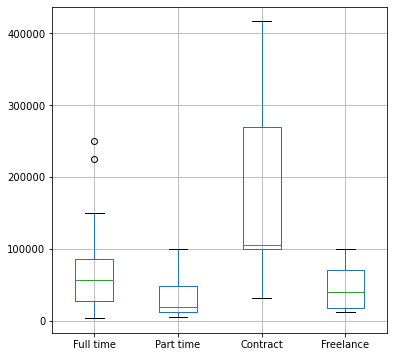

In [21]:
type_salary.boxplot(figsize = (6,6))

Text(0, 0.5, 'Average salary')

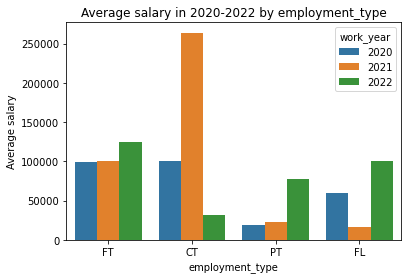

In [110]:
p = sns.barplot(data=dsSalary, x='employment_type', y='salary_in_usd', hue='work_year',ci = None)
p.set_title("Average salary in 2020-2022 by employment_type")
p.set_ylabel('Average salary')

From 2020 to 2022, the most populous DS work type is full employment. Contract data scientists' average salary is the highest. However, since its total population is too small, this conclusion may by unrepresentative.

### Company size analysis

In [22]:
dsSalary_company_size = dsSalary.groupby("company_size").agg(
    avg_salary_in_usd=('salary_in_usd', np.mean),
    salary_in_usd = ('salary_in_usd', np.sum),
    avg_remote_ratio=('remote_ratio', np.mean),
    remote_ratio = ('remote_ratio', np.sum)
)
ds_population_company_size = dsSalary["company_size"].value_counts()

dsSalary_company_size = pd.concat([ds_population_company_size, dsSalary_company_size], axis = 1)
company_size_list = ["Small","Medium","large"]
dsSalary_company_size = dsSalary_company_size.sort_values("avg_salary_in_usd")
dsSalary_company_size

,company_size,avg_salary_in_usd,salary_in_usd,avg_remote_ratio,remote_ratio
S,83,77632.674699,6443512,69.879518,5800
M,326,116905.466258,38111182,72.546012,23650
L,198,119242.994949,23610113,68.686869,13600


In [23]:
salary_S = dsSalary.loc[dsSalary["company_size"] == "S"]["salary_in_usd"]
salary_M = dsSalary.loc[dsSalary["company_size"] == "M"]["salary_in_usd"]
salary_L = dsSalary.loc[dsSalary["company_size"] == "L"]["salary_in_usd"]
salary_S = salary_S.reset_index(drop=True)
salary_M = salary_M.reset_index(drop=True)
salary_L = salary_L.reset_index(drop=True)

salary_company_size = pd.DataFrame({'Small': salary_S, 
                            'Medium':salary_M , 
                            'Large': salary_L})
#salary_company_size.head(10)

<AxesSubplot:>

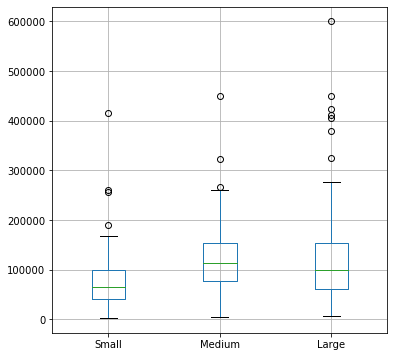

In [24]:
salary_company_size.boxplot(figsize = (6,6))

Text(0, 0.5, 'Average salary')

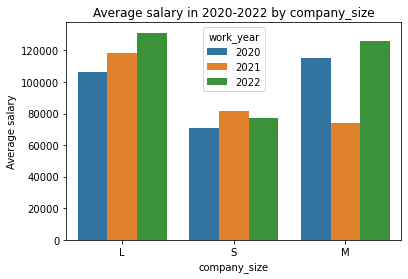

In [119]:
p = sns.barplot(data=dsSalary, x='company_size', y='salary_in_usd', hue='work_year',ci = None)
p.set_title("Average salary in 2020-2022 by company_size")
p.set_ylabel('Average salary')

In the last three years 2020 - 2022, medium-size company offered highest salary, but large size company can offer much higher wage with wider QR range. And the large company's salary increasing is most stable.

### Job analysis

In [25]:
dsSalary_job = dsSalary.groupby("job_title").agg(
    avg_salary_in_usd=('salary_in_usd', np.mean),
    salary_in_usd = ('salary_in_usd', np.sum),
    avg_remote_ratio=('remote_ratio', np.mean),
    remote_ratio = ('remote_ratio', np.sum)
)
ds_population_job = dsSalary["job_title"].value_counts()

dsSalary_job = pd.concat([ds_population_job, dsSalary_job], axis = 1)
#dsSalary_job

<AxesSubplot:xlabel='avg_salary_in_usd'>

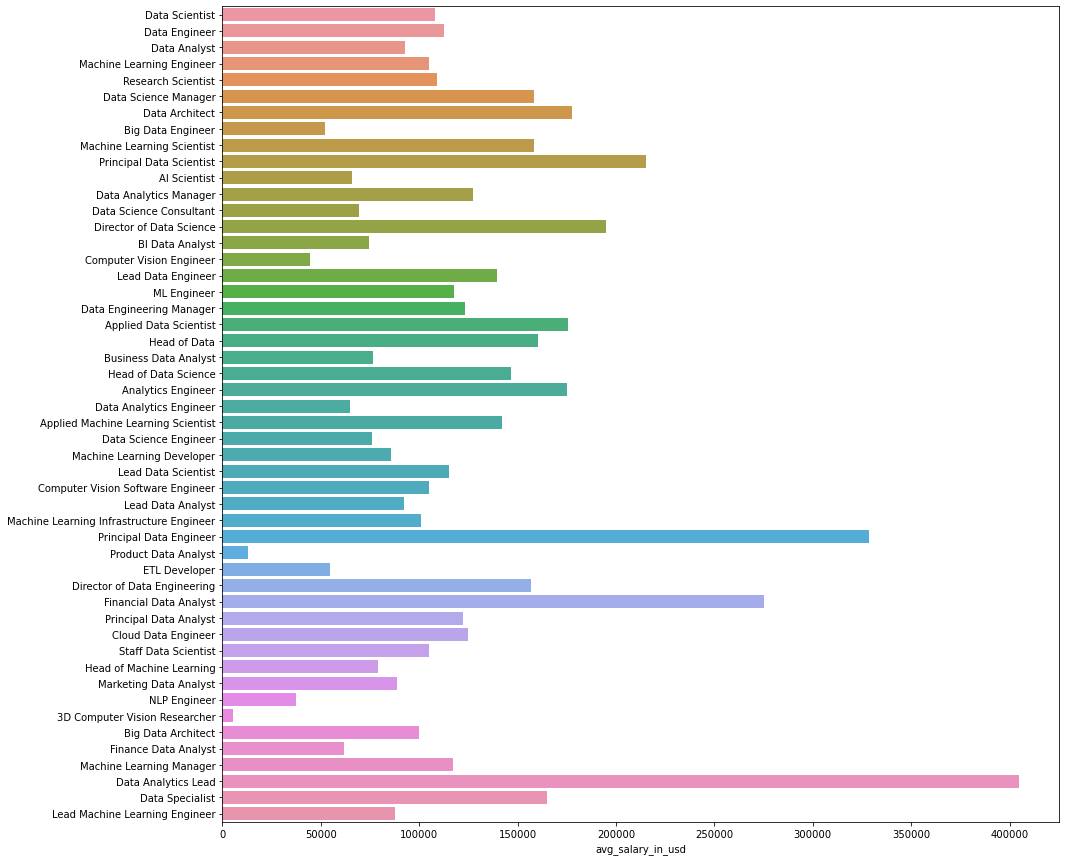

In [26]:
plt.figure(figsize = (15,15))
sns.barplot(x = dsSalary_job["avg_salary_in_usd"],y = dsSalary_job["avg_salary_in_usd"].index)

In [27]:
dsSalary_job = dsSalary_job.sort_values("avg_salary_in_usd")
ds_top_10_job = dsSalary_job.tail(10)
ds_top_10_job

,job_title,avg_salary_in_usd,salary_in_usd,avg_remote_ratio,remote_ratio
Head of Data,5,160162.600000,800813,90.000000,450
Data Specialist,1,165000.000000,165000,100.000000,100
Analytics Engineer,4,175000.000000,700000,50.000000,200
Applied Data Scientist,5,175655.000000,878275,70.000000,350
Data Architect,11,177873.909091,1956613,100.000000,1100
Director of Data Science,7,195074.000000,1365518,42.857143,300
Principal Data Scientist,7,215242.428571,1506697,85.714286,600
Financial Data Analyst,2,275000.000000,550000,75.000000,150
Principal Data Engineer,3,328333.333333,985000,100.000000,300
Data Analytics Lead,1,405000.000000,405000,100.000000,100


The top 10 jobs are: 

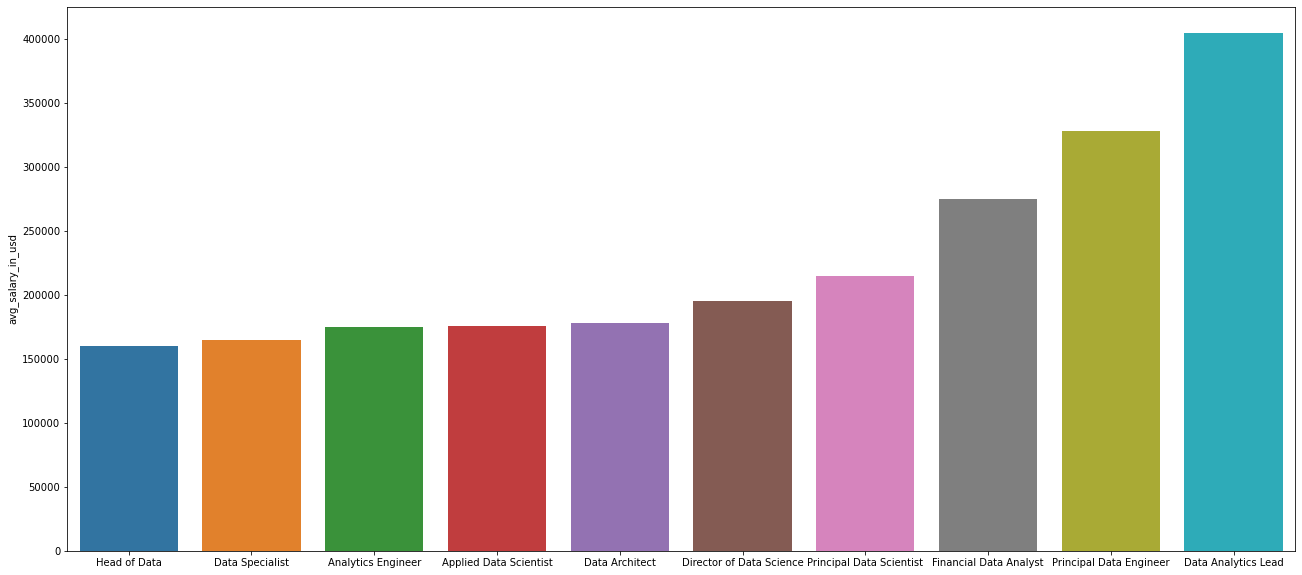

In [89]:
plt.figure(figsize = (22,10))
sns.barplot(x = ds_top_10_job["avg_salary_in_usd"].index,y = ds_top_10_job["avg_salary_in_usd"])

### Company location analysis

In [29]:
dsSalary_location = dsSalary.groupby("company_location").agg(
    avg_salary_in_usd=('salary_in_usd', np.mean),
    salary_in_usd = ('salary_in_usd', np.sum),
    avg_remote_ratio=('remote_ratio', np.mean),
    remote_ratio = ('remote_ratio', np.sum)
)
ds_population_location = dsSalary["company_location"].value_counts()

dsSalary_location = pd.concat([ds_population_location, dsSalary_location], axis = 1)
#dsSalary_location

We can see that the top 10 countries are: 

In [30]:
dsSalary_location = dsSalary_location.sort_values("avg_salary_in_usd")
ds_top_10_country = dsSalary_location.tail(10)
ds_top_10_country

,company_location,avg_salary_in_usd,salary_in_usd,avg_remote_ratio,remote_ratio
CA,30,99823.733333,2994712,75.000000,2250
DZ,1,100000.000000,100000,50.000000,50
AE,3,100000.000000,300000,66.666667,200
IQ,1,100000.000000,100000,50.000000,50
AU,3,108042.666667,324128,83.333333,250
JP,6,114127.333333,684764,41.666667,250
IL,1,119059.000000,119059,100.000000,100
NZ,1,125000.000000,125000,50.000000,50
US,355,144055.261972,51139618,77.746479,27600
RU,2,157500.000000,315000,25.000000,50


<AxesSubplot:xlabel='avg_salary_in_usd'>

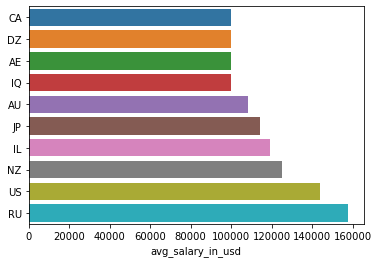

In [31]:
sns.barplot(x = ds_top_10_country["avg_salary_in_usd"],y = ds_top_10_country["avg_salary_in_usd"].index)

## Explore the relationships between data scientists’ salary and influencing Factors

Now I hope to explore the relationship between data scientists' salary and their working experience, working competence, region and company. I try to build a model which can help us make a prediction about data scienctist's level. Since almost all my variables are categorical variables, it will not be a high-accuraty model. But we can still have a look of which variables have more impact on data scienctist's salary level.


Before start model building and training, I divide data scientist's salary level into three levels: high salary, median salary and low salary. I decide those three level's range from overall data scientist's salary distribution. If a data scientist's yearly salary in U.S.dollar is large than $\$183k$, he/she will be a high salary data scientist. If his/her yearly salary is less than $\$41k$, he/she will be a low salary data scientist. 

In [33]:
#level bounds for salary check
mean_salary = dsSalary["salary_in_usd"].mean()
std_salary = dsSalary["salary_in_usd"].std()
high_level_range = mean_salary + std_salary
low_level_range = mean_salary - std_salary
print(f"high level range is ${high_level_range}",f"low level range is ${low_level_range}")

high level range is 183255.12926312553 low level range is 41340.610440334116


In [34]:
#salary level check
def salary_level_check(s):
    if s > high_level_range:
        output = "High"
    elif s < low_level_range:
        output = "Low"
    else:
        output = "Median"
    return output

In [35]:
# add column: salary level check
dsSalary["salary_level"] = dsSalary["salary_in_usd"].apply(salary_level_check)

#replace salary with salary level
dsSalary = dsSalary.drop(["salary"], axis = 1)
dsSalary = dsSalary.drop(["salary_in_usd"], axis = 1)

In [36]:
dsSalary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_level
0,2020,MI,FT,Data Scientist,EUR,DE,0,DE,L,Median
1,2020,SE,FT,Machine Learning Scientist,USD,JP,0,JP,S,High
2,2020,SE,FT,Big Data Engineer,GBP,GB,50,GB,M,Median
3,2020,MI,FT,Product Data Analyst,USD,HN,0,HN,S,Low
4,2020,SE,FT,Machine Learning Engineer,USD,US,50,US,L,Median


Now I transfer the categorical variables so that they can be used in model. Here is a heatmap coefficient matrix for all variables.

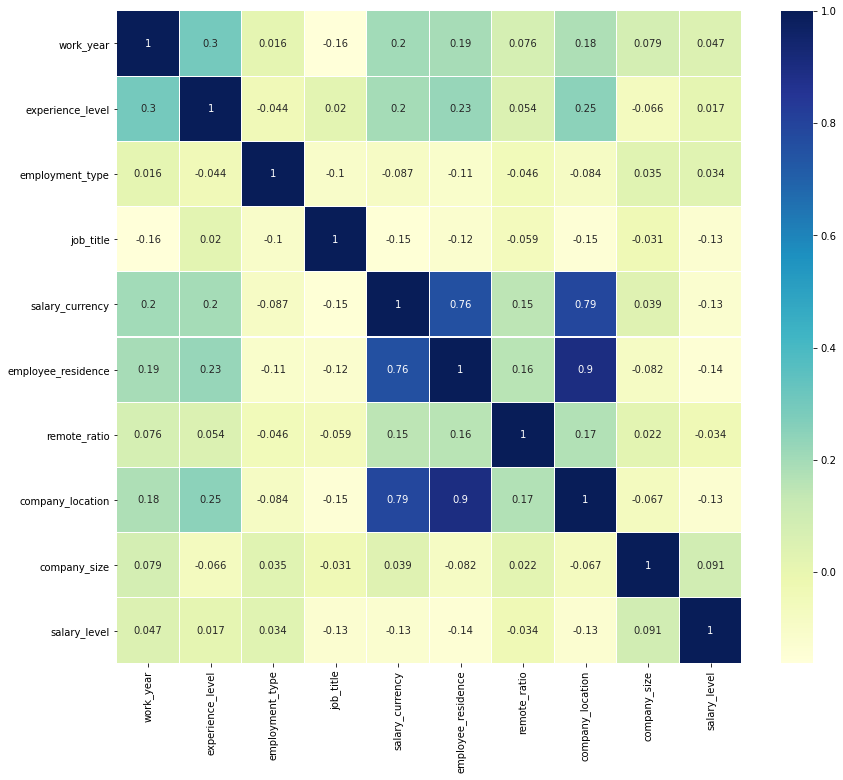

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in dsSalary.columns:
    dsSalary[column] = labelencoder.fit_transform(dsSalary[column])
plt.figure(figsize=(14,12))
sns.heatmap(dsSalary.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In this heatmap, it looks that company size has most impact on data scientist' salary level. Now we start build model to have a check. I use three models for the relationship finding: Logistic Regression, Neutral Network and Random Forest, they are all common models for classification.

In [38]:
#Now we have transformed the categorical varibales into numbers now
dsSalary.head()
# # high: 0, low: 1 mediam: 2   (MHML:2021)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_level
0,0,2,2,22,7,14,0,12,0,2
1,0,3,2,41,16,32,0,29,2,0
2,0,3,2,7,8,20,1,18,1,2
3,0,2,2,47,16,23,0,20,2,1
4,0,3,2,38,16,55,1,48,0,2


### Logistic Regression

In [39]:
def plot_roc(mod, X, y):
    # predicted_probs is an N x 2 array, where N is number of observations
    # and 2 is number of classes
    predicted_probs = mod.predict_proba(X_test)

    # keep the second column, for label=1
    predicted_prob1 = predicted_probs[:, 1]

    fpr, tpr, _ = metrics.roc_curve(y_test, predicted_prob1,pos_label=1)

    # Plot ROC curve
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], "k--")
    ax.plot(fpr, tpr)
    ax.set_xlabel("False Rate")
    ax.set_ylabel("True Rate")
    ax.set_title("ROC Curve")

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_auc_score

X = dsSalary.drop(["salary_level"], axis = 1)
y = dsSalary["salary_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 9) (152, 9) (455,) (152,)


In [41]:
salary_logistic_model = linear_model.LogisticRegression(solver = "liblinear")
salary_logistic_model.fit(X_train, y_train)
salary_logistic_model_test = salary_logistic_model.predict(X_test)
beta_0 = salary_logistic_model.intercept_[0]
beta_1 = salary_logistic_model.coef_[0][0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} decile_score)")

Fit model: p(recid) = L(-1.9457 + -0.0039 decile_score)


In [42]:
salary_logistic_model.coef_[0]

array([-3.93833245e-03,  3.47311731e-01, -2.23877792e+00,  4.14340538e-02,
        1.36356263e-01,  2.56999957e-02,  8.64581932e-02,  3.40224757e-04,
       -7.00940301e-01])

Logistic model's training score is 0.7341, test score is 0.7237
Logistic model's confusion matrix is
[[  0   0  23]
 [  1   2  11]
 [  2   5 108]]
The report of for Logistic model is:
               precision    recall  f1-score   support

  High salary       0.00      0.00      0.00        23
   Low salary       0.29      0.14      0.19        14
medium salary       0.76      0.94      0.84       115

     accuracy                           0.72       152
    macro avg       0.35      0.36      0.34       152
 weighted avg       0.60      0.72      0.65       152

The AUC score for Logistic model is: 0.7253782816472402
The ROC curve for Logistic model is:


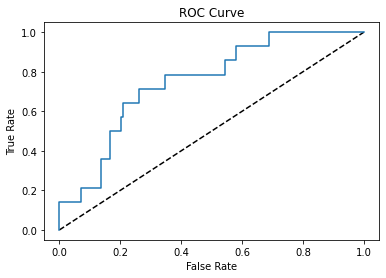

In [43]:
logistic_confusion_matrix = metrics.confusion_matrix(y_test, salary_logistic_model_test)

logistic_score_train = salary_logistic_model.score(X_train, y_train)
logistic_score_test = salary_logistic_model.score(X_test, y_test)
print(f"Logistic model's training score is {logistic_score_train.round(4)}, test score is {logistic_score_test.round(4)}")
print("Logistic model's confusion matrix is")
print(logistic_confusion_matrix)

report = metrics.classification_report(
    y_test, salary_logistic_model.predict(X_test),
    target_names=["High salary", "Low salary","medium salary"]
)
print("The report of for Logistic model is:")
print(report)


plot_roc(salary_logistic_model, X_test, y_test)
preds_logistic = salary_logistic_model.predict_proba(X_test)
auc_score_logistic = roc_auc_score(y_test, preds_logistic,multi_class='ovr')
print(f"The AUC score for Logistic model is: {auc_score_logistic}")
print("The ROC curve for Logistic model is:")

### Neutral Network 

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

Neutral Network model's training score is 0.7758, test score is 0.7237
Neutral Network model's confusion matrix is
[[  0   2  21]
 [  0   2  12]
 [  1   6 108]]
The report for Neutral Network model is:
               precision    recall  f1-score   support

  High salary       0.00      0.00      0.00        23
   Low salary       0.20      0.14      0.17        14
medium salary       0.77      0.94      0.84       115

     accuracy                           0.72       152
    macro avg       0.32      0.36      0.34       152
 weighted avg       0.60      0.72      0.65       152

The AUC score for Neutral Network model is: 0.7474235249260528
The ROC curve for Neutral Network model is:


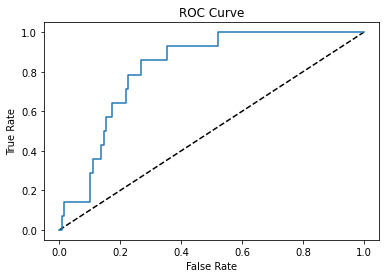

In [45]:
salary_neutral_model = MLPClassifier(random_state=1, max_iter=500)
salary_neutral_model.fit(X_train, y_train)
salary_neutral_model_test = salary_neutral_model.predict(X_test)

neutral_score_train = salary_neutral_model.score(X_train, y_train)
neutral_score_test = salary_neutral_model.score(X_test, y_test)
neutral_confusion_matrix = metrics.confusion_matrix(y_test, salary_neutral_model_test)
print(f"Neutral Network model's training score is {neutral_score_train.round(4)}, test score is {neutral_score_test.round(4)}")
print("Neutral Network model's confusion matrix is")
print(neutral_confusion_matrix)

report = metrics.classification_report(
    y_test, salary_neutral_model.predict(X_test),
    target_names=["High salary", "Low salary","medium salary"]
)
print("The report for Neutral Network model is:")
print(report)

plot_roc(salary_neutral_model, X_test, y_test)

preds_neutral = salary_neutral_model.predict_proba(X_test)
auc_score_neutral = roc_auc_score(y_test, preds_neutral,multi_class='ovr')
print(f"The AUC score for Neutral Network model is: {auc_score_neutral}")
print("The ROC curve for Neutral Network model is:")

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

Random Forest model's training score is 0.9407, test score is 0.7763
Random Forest model's confusion matrix is
[[ 10   0  13]
 [  0   5   9]
 [  7   5 103]]
The report for Random Forest model is:
               precision    recall  f1-score   support

  High salary       0.59      0.43      0.50        23
   Low salary       0.50      0.36      0.42        14
medium salary       0.82      0.90      0.86       115

     accuracy                           0.78       152
    macro avg       0.64      0.56      0.59       152
 weighted avg       0.76      0.78      0.76       152

The AUC score for Random Forest model is: 0.867672139133211
The ROC curve for Random Forest model is:


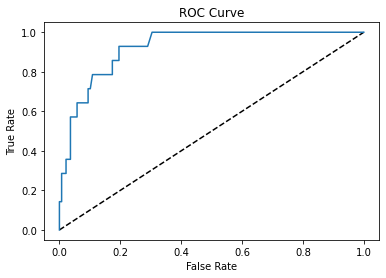

In [47]:
salary_rf_model = RandomForestClassifier(n_estimators=1000)
salary_rf_model.fit(X_train, y_train)
salary_rf_model_test = salary_rf_model.predict(X_test)

rf_score_train = salary_rf_model.score(X_train, y_train)
rf_score_test = salary_rf_model.score(X_test, y_test)
rf_confusion_matrix = metrics.confusion_matrix(y_test, salary_rf_model_test)
print(f"Random Forest model's training score is {rf_score_train.round(4)}, test score is {rf_score_test.round(4)}")
print("Random Forest model's confusion matrix is")
print(rf_confusion_matrix)

report = metrics.classification_report(
    y_test, salary_rf_model.predict(X_test),
    target_names=["High salary", "Low salary","medium salary"]
)
print("The report for Random Forest model is:")
print(report)

plot_roc(salary_rf_model, X_test, y_test)

preds_rf = salary_rf_model.predict_proba(X_test)
auc_score_rf = roc_auc_score(y_test, preds_rf,multi_class='ovr')
print(f"The AUC score for Random Forest model is: {auc_score_rf}")
print("The ROC curve for Random Forest model is:")

From those three model's report, we can see that Random Forest model performs much better on both AUC, accuary and precision.Now we have a look of variable's importance in Random Forest Model.

In [50]:
importance = salary_rf_model.feature_importances_
print(importance)

[0.06276925 0.10684265 0.0281188  0.28301724 0.09573001 0.1885592
 0.05800847 0.12504654 0.05190785]


In [72]:
variable_list = []
for col in dsSalary:
    variable_list.append(col)
variable_list.remove('salary_level')
variable_list

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

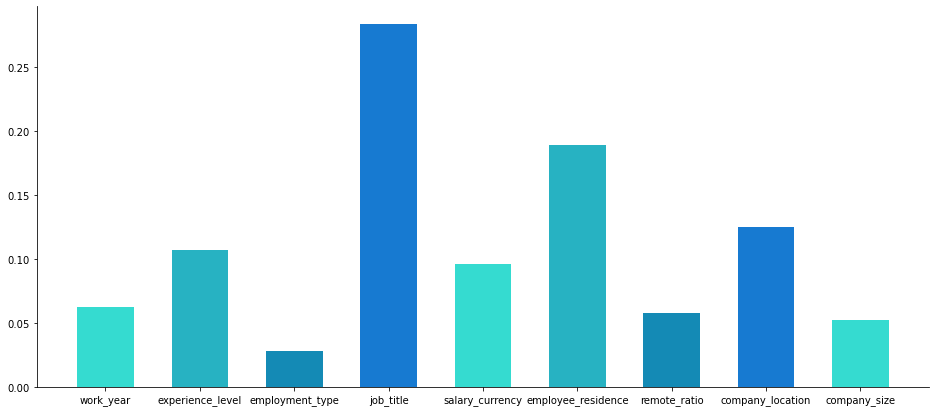

In [90]:
fig,ax = plt.subplots(figsize=(16,7))

bar_rf = plt.bar(range(len(importance)), importance,
                         width = 0.6,color=color_list,tick_label=variable_list)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

We can see that the most effective factor for data scienctist's salary is their job title. Employee residence and company location also play inportant role in data scienctist's salary decision. The influence of company size on wages is not as prominent as we seen in heatmap above.

## Conclusion:


Random Forest is the best model for salary level classification, and the most effective factor is job title, employee residence and company location.